In [9]:
#points

In [10]:
from volumetricspy.stats import Dot,CloudPoints, Spherical, IndicatorOridinaryKrigging
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d


In [11]:
p1 = Dot(x=50,y=40, fields={'facies':'sand'})
p2 = Dot(x=20,y=90, fields={'facies':'coal'})
p3 = Dot(x=60,y=70, fields={'facies':'shale'})
p = CloudPoints(points = [p1,p2,p3])
#p.one_hot_encode('facies')
print(p.df())

      x     y     z   crs facies
0  50.0  40.0  None  None   sand
1  20.0  90.0  None  None   coal
2  60.0  70.0  None  None  shale


In [12]:
up1 = Dot(x=70,y=27)
up = CloudPoints(points = [up1])
up.df()

,x,y,z,crs
0,70.0,27.0,None,None


<AxesSubplot:>

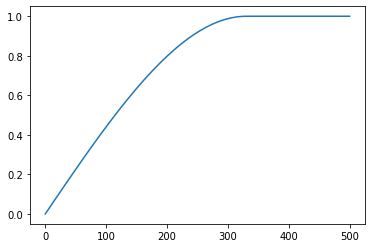

In [13]:
s1 = Spherical(
    sill = 1.,
    range = 330,
    nuggets = 0.
)

s1.plot(np.linspace(0,500,50))

In [14]:
p.df()

,x,y,z,crs,facies
0,50.0,40.0,None,None,sand
1,20.0,90.0,None,None,coal
2,60.0,70.0,None,None,shale


In [15]:
ik = IndicatorOridinaryKrigging(
    known_cp = p,
    unknown_cp = up,
    variogram_model = s1
)
ik

IndicatorOridinaryKrigging(known_cp=CloudPoints(points=[Dot(x=50.0, y=40.0, z=None, crs=None, fields={'facies': 'sand'}), Dot(x=20.0, y=90.0, z=None, crs=None, fields={'facies': 'coal'}), Dot(x=60.0, y=70.0, z=None, crs=None, fields={'facies': 'shale'})]), unknown_cp=CloudPoints(points=[Dot(x=70.0, y=27.0, z=None, crs=None, fields=None)]), variogram_model=Spherical(sill=1.0, nugget=0.0, range=330.0))

<AxesSubplot:>

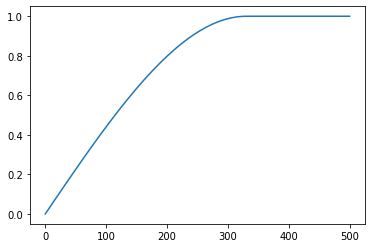

In [19]:
ik.variogram_model.plot(np.linspace(0,500,50))

In [20]:
rcp = ik.forward('facies')
rcp.df()

variogram_model: extra={}


AttributeError: 'FieldInfo' object has no attribute 'covariance'

In [ ]:
up1= s1.ordinary_kriging(p, up, 'coal')
up2=s1.ordinary_kriging(p, up1, 'sand')
up3=s1.ordinary_kriging(p, up2, 'shale')

In [ ]:
up3.df()

In [ ]:
up3.df()[['coal','shale','sand']].sum(axis=1)

In [ ]:
p.plot(hue='facies')
up3.plot(color='red')

In [ ]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
df['Facies'] = df['Facies'].map({0:'sand',1:'shale'})
df

In [ ]:
cp = CloudPoints().from_df(df, x='X',y='Y', fields=['Facies','Porosity','Perm'])
cp.df()

In [ ]:
cp.one_hot_encode('Facies').df()

In [ ]:
cp.plot(hue='Facies')

In [ ]:
s2 = Spherical(
    sill = 1.,
    range = 150,
    nuggets = 0.
)

s2.plot(np.linspace(0,500,50))

In [ ]:
xn = np.linspace(0,1000,50)
yn = np.linspace(0,1000,50)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
grid = CloudPoints().from_df(dfun, x='x',y='y')

In [ ]:
wm1 = s2.ordinary_kriging(cp,grid,v='shale')
print('--')
wm2 = s2.ordinary_kriging(cp,wm1,v='sand')

In [ ]:
pred = wm2.df()[['sand','shale']].idxmax(axis=1).to_frame()
pred.columns=['pred']
pred

In [ ]:
wm2.add_fields_from_df(pred, ['pred'])
wm2.df()

In [ ]:
wm2.plot(hue='pred')

In [ ]:
cp.plot(hue='Facies')